In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

### Read CSV and Clean

In [3]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df.koi_disposition.value_counts()
y = df["koi_disposition"].apply(lambda x:0 if x == "FALSE POSITIVE" else 1)
y.value_counts()

0    3504
1    3487
Name: koi_disposition, dtype: int64

In [4]:
X = df.drop("koi_disposition", axis =1)
X.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,-0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,-0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,-0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,-0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


### Feature Selection (using Random Forest Classifier)

In [5]:
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [6]:
model.feature_importances_

array([0.15373348, 0.10830523, 0.17688763, 0.06205556, 0.01503148,
       0.01718312, 0.01526624, 0.00741053, 0.00877409, 0.00784464,
       0.01102296, 0.00484088, 0.00411918, 0.00915682, 0.0172091 ,
       0.01840185, 0.02016484, 0.00929729, 0.0066521 , 0.06965078,
       0.04726071, 0.03089463, 0.01427502, 0.01673965, 0.02112085,
       0.01475216, 0.01152752, 0.00103169, 0.00423978, 0.03042104,
       0.02056165, 0.00478819, 0.00404668, 0.0047632 , 0.00469579,
       0.00807219, 0.0040265 , 0.00529738, 0.00396705, 0.00451054])

In [7]:
X.columns.to_list()

['koi_fpflag_nt',
 'koi_fpflag_ss',
 'koi_fpflag_co',
 'koi_fpflag_ec',
 'koi_period',
 'koi_period_err1',
 'koi_period_err2',
 'koi_time0bk',
 'koi_time0bk_err1',
 'koi_time0bk_err2',
 'koi_impact',
 'koi_impact_err1',
 'koi_impact_err2',
 'koi_duration',
 'koi_duration_err1',
 'koi_duration_err2',
 'koi_depth',
 'koi_depth_err1',
 'koi_depth_err2',
 'koi_prad',
 'koi_prad_err1',
 'koi_prad_err2',
 'koi_teq',
 'koi_insol',
 'koi_insol_err1',
 'koi_insol_err2',
 'koi_model_snr',
 'koi_tce_plnt_num',
 'koi_steff',
 'koi_steff_err1',
 'koi_steff_err2',
 'koi_slogg',
 'koi_slogg_err1',
 'koi_slogg_err2',
 'koi_srad',
 'koi_srad_err1',
 'koi_srad_err2',
 'ra',
 'dec',
 'koi_kepmag']

In [8]:
feature_names = np.array(X.columns.to_list())
sorted_index = model.feature_importances_.argsort()
tree_feature_importances = model.feature_importances_

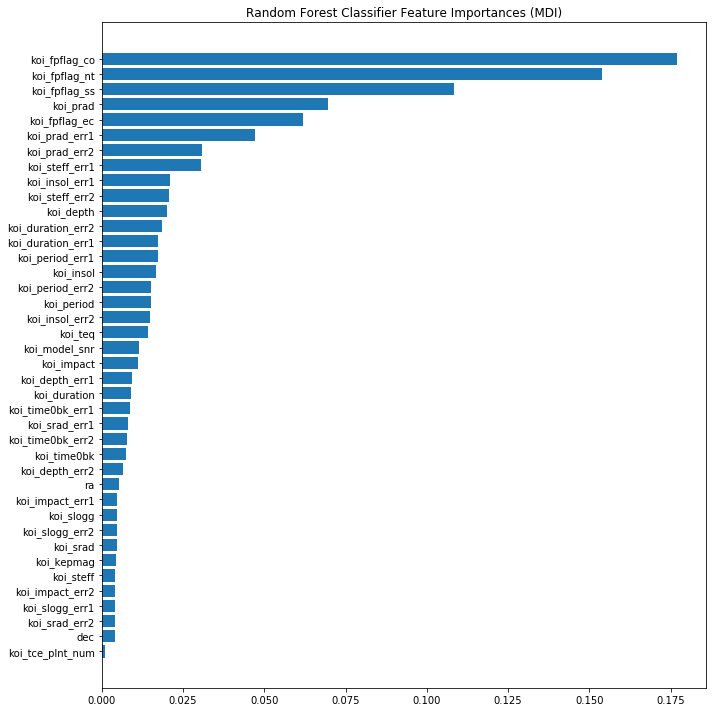

In [9]:
y_ticks = np.arange(0, len(feature_names))
fig, ax = plt.subplots(figsize=(10, 10))
ax.barh(y_ticks, tree_feature_importances[sorted_index])
ax.set_yticklabels(feature_names[sorted_index])
ax.set_yticks(y_ticks)
ax.set_title("Random Forest Classifier Feature Importances (MDI)")
fig.tight_layout()
plt.show()

In [10]:
selected_features = X[['koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_nt', 'koi_prad', 'koi_fpflag_ec', 'koi_prad_err1']].copy()